### Importing Libraries

In [0]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import functional as f
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# plt.style.use('dark_background')
plt.style.use('ggplot')

In [0]:
!cp drive/My\ Drive/torch/iris.csv .

### Reading the dataset

In [83]:
df = pd.read_csv("iris.csv")
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


### Visualization

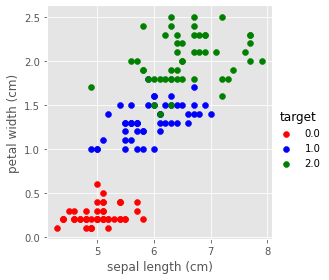

In [84]:
import seaborn as sns
d = {'color': ['r', 'b', 'g']}

sns.FacetGrid(df, hue="target", height=4, hue_kws=d) \
   .map(plt.scatter, "sepal length (cm)", "petal width (cm)") \
   .add_legend()

In [0]:
features = df.drop(['target'],axis=1).values
label = df["target"].values
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [0]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Class Model

In [0]:
class Model(nn.Module):

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [0]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

### Train our Model

In [89]:
model.train()
epochs = 1000
losses = []
losses_val = []

for i in range(epochs):

  y_pred = model.forward(x_train)

  # y_train = y_train.squeeze_()
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  if i%10 ==0:
    print(f'Epoch {i} and loss is: {loss}')
  
  ### Back Prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)
    losses_val.append(loss)
    

Epoch 0 and loss is: 1.1376785039901733
Epoch 10 and loss is: 1.1144554615020752
Epoch 20 and loss is: 1.100610613822937
Epoch 30 and loss is: 1.0910670757293701
Epoch 40 and loss is: 1.0819634199142456
Epoch 50 and loss is: 1.0712426900863647
Epoch 60 and loss is: 1.057342767715454
Epoch 70 and loss is: 1.0389821529388428
Epoch 80 and loss is: 1.0147866010665894
Epoch 90 and loss is: 0.9848814606666565
Epoch 100 and loss is: 0.9492081999778748
Epoch 110 and loss is: 0.9078032970428467
Epoch 120 and loss is: 0.8608844876289368
Epoch 130 and loss is: 0.8095821738243103
Epoch 140 and loss is: 0.7559033632278442
Epoch 150 and loss is: 0.702052652835846
Epoch 160 and loss is: 0.6441313624382019
Epoch 170 and loss is: 0.5881006717681885
Epoch 180 and loss is: 0.5417505502700806
Epoch 190 and loss is: 0.5040922164916992
Epoch 200 and loss is: 0.4737725555896759
Epoch 210 and loss is: 0.4491458535194397
Epoch 220 and loss is: 0.4272126853466034
Epoch 230 and loss is: 0.4073456823825836
Epoch 

### Plot our loss

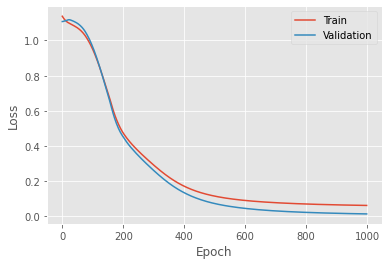

In [90]:
plt.plot(range(epochs), losses, label='Train')
plt.plot(range(epochs), losses_val, label='Validation')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [91]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(x_test):

    y_eval = model.forward(data)

    print(f'{i+1}.) {str(y_eval)} {y_test[i]}')
    if y_eval.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1.) tensor([-0.3491,  4.5847, -3.6870]) 1
2.) tensor([-2.6135,  3.9771, -0.5875]) 1
3.) tensor([ 10.3726,   2.5478, -14.2802]) 0
4.) tensor([  8.7724,   2.4544, -12.3390]) 0
5.) tensor([-0.2112,  4.5655, -3.8348]) 1
6.) tensor([-3.5302,  0.6547,  3.2116]) 2
7.) tensor([-2.1726,  4.5696, -1.5511]) 1
8.) tensor([-2.0830,  5.1294, -2.1533]) 1
9.) tensor([ 0.4845,  4.9622, -5.0012]) 1
10.) tensor([-3.9992, -0.1457,  4.3593]) 2
11.) tensor([ 11.6809,   2.5848, -15.8309]) 0
12.) tensor([-4.1305, -0.7796,  5.1525]) 2
13.) tensor([-2.6841,  2.7415,  0.5391]) 1
14.) tensor([  9.6344,   2.4738, -13.3574]) 0
15.) tensor([-3.7977,  0.6642,  3.4705]) 2
16.) tensor([-2.8135,  3.6334, -0.0642]) 1
17.) tensor([ 10.8968,   2.6220, -14.9480]) 0
18.) tensor([  9.2784,   2.8378, -13.2867]) 0
19.) tensor([  9.0624,   2.6709, -12.8775]) 0
20.) tensor([ 11.9561,   2.6922, -16.2404]) 0
21.) tensor([-2.4735,  5.3823, -1.9274]) 1
22.) tensor([  9.6652,   2.6126, -13.5147]) 0
23.) tensor([  9.4723,   2.4230, -13

### Saving Model

In [0]:
torch.save(model, 'my_first_ANN_in_pytorch_iris.pt')